In [3]:
from sys import path, stderr, argv, exit
from os.path import realpath, dirname, isfile, isdir
import os
    
import numpy as np
import matplotlib.pyplot as plt

path.insert(1, "../../experiment_legacy/analysis/allen_src/")
import analysis_utils as utl

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

import urllib.request

from matplotlib.legend_handler import HandlerTuple
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

### settings

# setup analysis
plot_settings = utl.get_default_plot_settings()
plt.rcParams.update(plot_settings['rcparams'])

structures = ['VISp','VISl','VISrl','VISal','VISpm','VISam','LGd','LP']
structures_map = utl.get_structures_map()

In [5]:
# Download or load data

data_directory = os.path.abspath("../dat/")
manifest_path = os.path.join(data_directory, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

# no session from the functional connectivity set has enough data from
# all areas so we visualize using the brain observatory set
session_id = 755434585
session_download_link = "http://api.brain-map.org//api/v2/well_known_file_download/1026124684"
stimulus_presentation_id = 23800

session_file = os.path.join(data_directory, f'session_{session_id}', f'session_{session_id}.nwb')

if not isfile(session_file):
    print('downloading more than 2GB of data.. this may take a long time.')

    if not isdir(os.path.join(data_directory, f'session_{session_id}')):
        os.mkdir(os.path.join(data_directory, f'session_{session_id}'))

    urllib.request.urlretrieve(session_download_link,
                               session_file)
# elif not utl.check_file_hash(session_file):
#         print(f'wrong hash for {session_file}. please delete file and run script again.')
#         exit()

session = cache.get_session_data(session_id)

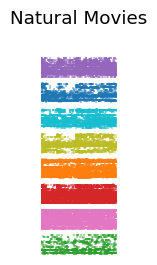

In [8]:
# Plot 
# plot for natural movies, marking repetitions of the scene (alternating white/ gray background)
ax = plt.subplot(9,2,2)
ax.set_axis_off()
ax.set_title('Natural Movies')

for i, structure in enumerate(structures):
    _units = session.units[utl.df_filter(session.units,
                                         structures=structure)].index.values
    
    t = np.arange(0,10,0.001)

    spike_data = session.presentationwise_spike_counts(
        bin_edges = t,
        stimulus_presentation_ids = [stimulus_presentation_id],
        unit_ids = _units
    )

    x, y = np.where(np.squeeze(spike_data.data))

    ax = plt.subplot(9,2,2 + (i+1)*2)

    ax.scatter(t[x],y,s=1, color=structures_map[structure]['color'], marker='|',alpha=0.4)

    ax.set_xlim([np.min(t),np.max(t)])

    ax.set_axis_off()
    
plt.savefig(
    "../img/example_units_natural_movie.pdf",
    bbox_inches="tight"
)